importamos uma base de dados com os valores históricos do indice SP500 diário

essa base de dados contém muitas outras informações, como taxa FED, taxa de desemprego, indice de confiança, entre outros, são quase 30 informações (features) adicioonais além do indice do SP500

limitamos a utilizar os dados dos ultimos 20 anos
normalizamos todos os dados
retirado as feaures onde os numeros são crescentes, com exceção do indice SP500


In [ ]:
import numpy as np
import pandas as pd
import requests as re
pd.options.display.float_format = "{:.2f}".format
dados=pd.read_csv('/content/drive/MyDrive/Estudos/BD/SP500_Date_Offset.csv')

In [ ]:
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

In [ ]:
dados.head()

,Date,SP500,Fed-Rate,Yield-10Y,Yield-1M,Yield-1Y,Yield-20Y,Yield-2Y,Yield-30Y,Yield-3M,...,NO-Durables_release,NO-Unfilled_release,PCE_release,PCE-Core_release,PPI-Architect_release,Total-Emp_release,Unemploy_release,Unemp-Weeks_release,Delinq-CreditC_release,GDP_release
0,1927-12-30,17.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1928-01-03,17.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1928-01-04,17.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1928-01-05,17.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1928-01-06,17.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
import datetime                                                      ### limitando para 20 anos
df=dados.iloc[19165:, :]
df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date',drop=False,inplace=True)
#df.reset_index(drop=False,inplace=True)

colunas = df.columns.tolist()                                       ### colocar coluna SP500 no meio
colunas.remove('SP500')
colunas.insert(13, 'SP500')
df = df[colunas]

<ipython-input-4-336f03da5198>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.head()                                       # df = limitado apartir de 2004

,Date,Fed-Rate,Yield-10Y,Yield-1M,Yield-1Y,Yield-20Y,Yield-2Y,Yield-30Y,Yield-3M,Yield-3Y,...,NO-Durables_release,NO-Unfilled_release,PCE_release,PCE-Core_release,PPI-Architect_release,Total-Emp_release,Unemploy_release,Unemp-Weeks_release,Delinq-CreditC_release,GDP_release
19165,2004-05-03,1.03,4.53,0.83,1.60,5.30,2.34,5.41,1.00,2.86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19166,2004-05-04,1.00,4.56,0.93,1.57,5.34,2.32,5.45,1.00,2.88,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19167,2004-05-05,0.99,4.61,0.90,1.56,5.38,2.34,5.46,0.99,2.91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19168,2004-05-06,1.00,4.63,0.89,1.61,5.41,2.39,5.46,1.00,2.94,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19169,2004-05-07,0.99,4.79,0.90,1.83,5.53,2.64,5.53,1.07,3.19,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00


> Normalizando dados para uma melhor visualização e comparaçãonos gráficos


In [ ]:
from sklearn.preprocessing import MinMaxScaler                  # normalizar dados
scaler = MinMaxScaler()

data=df[df.columns[0]]                                          # separando coluna Data para normalizar as demais
data=pd.DataFrame(data)
data.reset_index(drop=True,inplace=True)

semdata=df[df.columns[1:]]
semdata2 = pd.DataFrame(scaler.fit_transform(semdata), columns=semdata.columns)

dfN=data.join(semdata2)                                         # juntando novamente

In [ ]:
dfN.head()

,Date,Fed-Rate,Yield-10Y,Yield-1M,Yield-1Y,Yield-20Y,Yield-2Y,Yield-30Y,Yield-3M,Yield-3Y,...,NO-Durables_release,NO-Unfilled_release,PCE_release,PCE-Core_release,PPI-Architect_release,Total-Emp_release,Unemploy_release,Unemp-Weeks_release,Delinq-CreditC_release,GDP_release
0,2004-05-03,0.18,0.85,0.14,0.29,0.93,0.43,0.96,0.18,0.53,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2004-05-04,0.18,0.85,0.15,0.28,0.94,0.43,0.97,0.18,0.54,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2004-05-05,0.18,0.86,0.15,0.28,0.95,0.43,0.97,0.18,0.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2004-05-06,0.18,0.87,0.15,0.29,0.96,0.44,0.97,0.18,0.55,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2004-05-07,0.18,0.90,0.15,0.33,0.98,0.49,0.98,0.19,0.60,...,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00


Selecionado algumas featuras para mostrar gráficamente, mas conforme vemos, ainda não é possivel chegar a nenhuma informação relevante, talvez devo selecionar algumas colunas de cada vez

<Axes: xlabel='Date'>

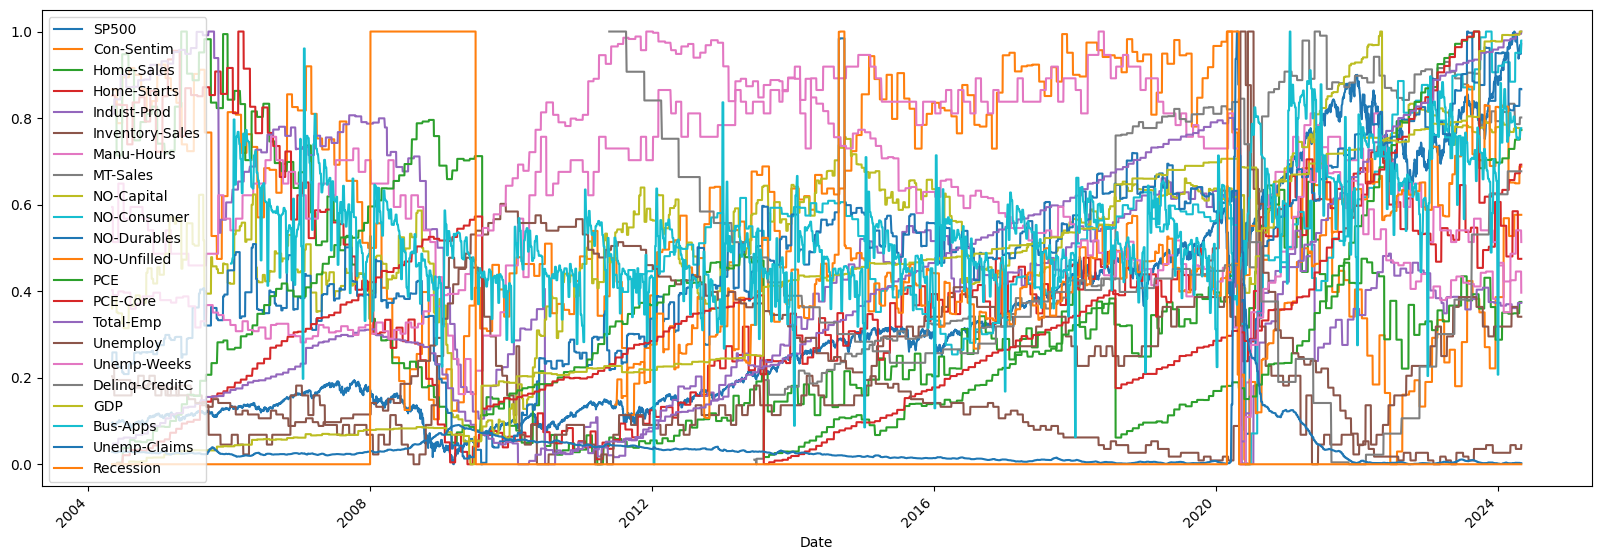

In [ ]:
colunas=dfN.columns[13:44]                      # selecionando (retirando) colunas
nao=['Con-Spends', 'CPI', 'CPI-Core','CPI-Services', 'Income-Trans','PPI-Architect','Loans-CI', 'Loans-Cons','Loans-RE']
colunas2 = colunas.drop(nao)
dfN.plot (x='Date',y=colunas2, rot=45,figsize=(20,7))

Neste gráfico foi retirado algumas colunas do total de colunas, porém ainda confuso


<Axes: xlabel='Date'>

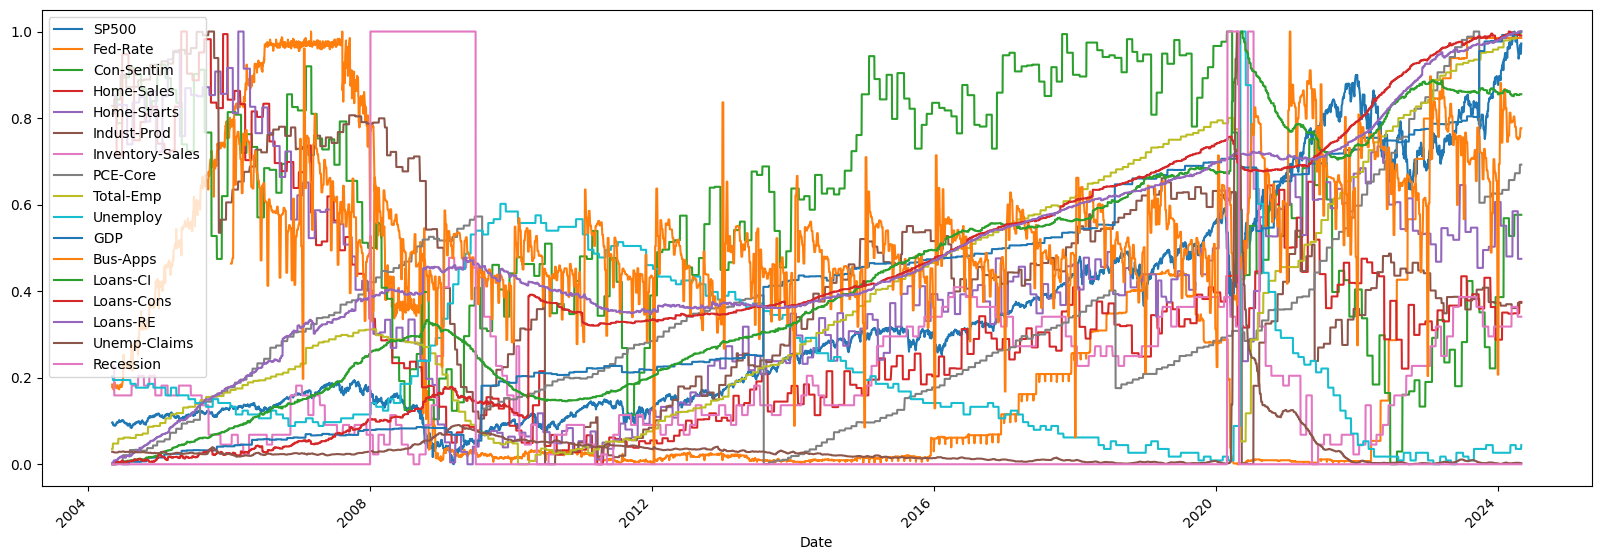

In [ ]:
selecionados=['SP500','Fed-Rate','Con-Sentim','Home-Sales','Home-Starts','Indust-Prod','Inventory-Sales','PCE-Core','Total-Emp','Unemploy','GDP','Bus-Apps','Loans-CI','Loans-Cons','Loans-RE','Unemp-Claims','Recession']
#indice=pd.DataFrame(df.index)
dfN.plot (x='Date',y=selecionados, rot=45,figsize=(20,7) )               # atribuindo colunas

Reduzido o periodo, para apartir de de Julho de 2020


<Axes: xlabel='Date'>

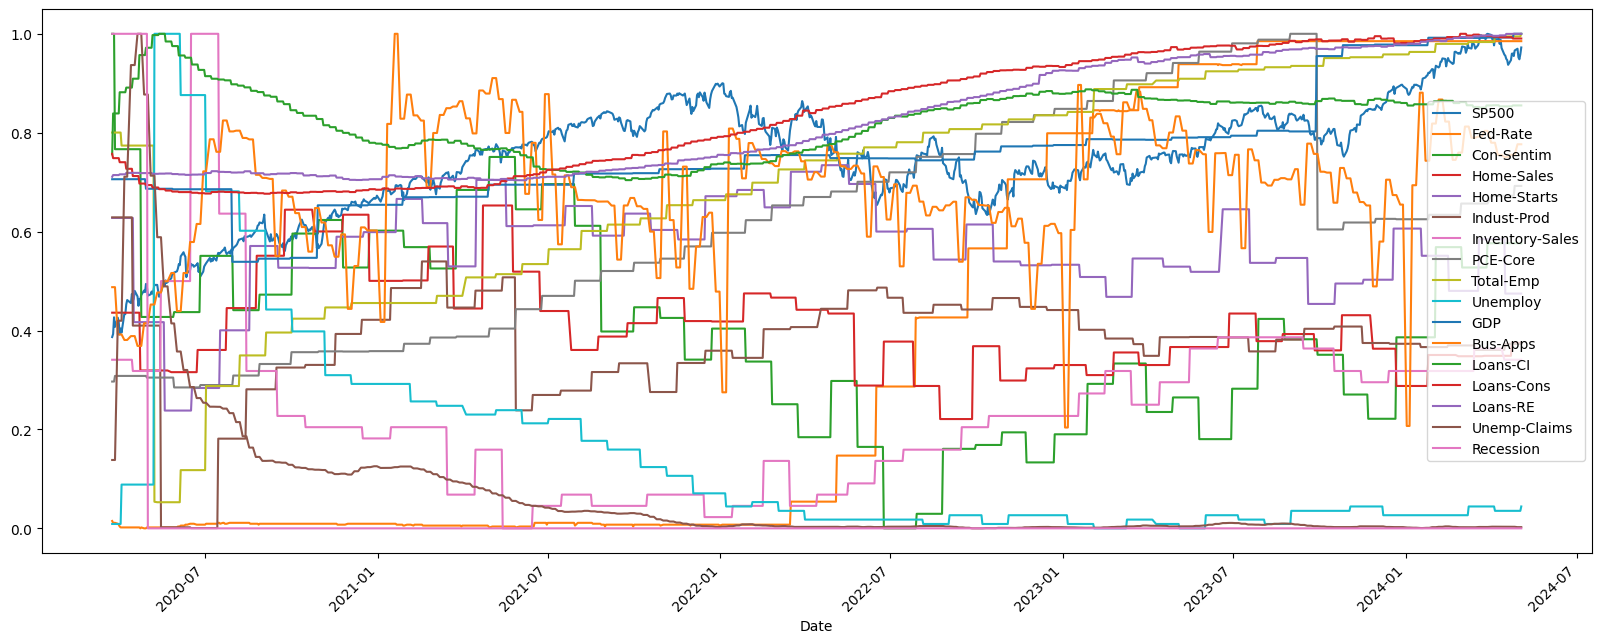

In [ ]:
dfN2=dfN.loc[4000:,:]                                     # atribuindo colunas e periodo
dfN2.plot(x='Date',y=selecionados, rot=45,figsize=(20,8))

Gráfico com apenas 2 features ('Con-Sentim', 'SP500'), dos ultimos 20 anos e adicionado uma faixa de destaque do periodo aproximado dos efeitos da pandemia. Repare que com exceção do perido citado anteriormente, as 2 linhas continuam em alta, assim como iniciou em 2009



'Con-Sentim': Sentimento do Consumidor: Índice que mede o sentimento dos consumidores sobre a economia.

'SP500': S&P 500: Índice que representa as 500 maiores empresas listadas na bolsa de valores dos EUA.

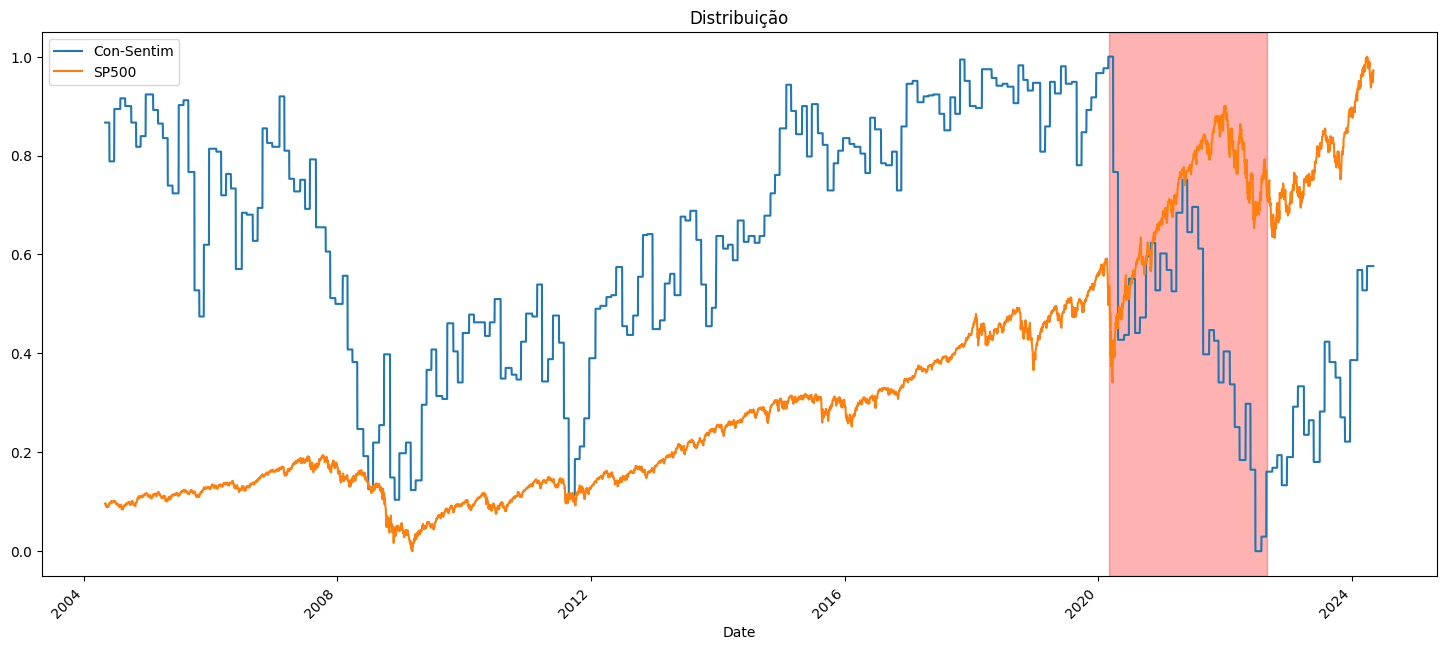

In [ ]:
import matplotlib.pyplot as plt
ax = dfN.plot(x='Date', y=['Con-Sentim', 'SP500'], rot=45, figsize=(18,8))
# ax.figure.set_size_inches(18,8)
ax.axvspan('2020-03-01', '2022-09-01', color='red', alpha=0.3)
ax.set_title ('Distribuição')
ax.set_label ('Alt')
plt.show()

Abaixo as datas onde o 'Con-Sentim' esteve mais baixo de toda a série, confirmamos essas datas no gráfico acima

In [ ]:
df2 = df.set_index('Date',drop=True)                                # df2 = coluna data como coluna indice

In [ ]:
df3=df2[df2['Con-Sentim'].between(0,50)]
pd.DataFrame(df3.index)

,Date
0,2022-06-24
1,2022-06-27
2,2022-06-28
3,2022-06-29
4,2022-06-30
5,2022-07-01
6,2022-07-05
7,2022-07-06
8,2022-07-07
9,2022-07-08


Abaixo alguns dados interessantes sobre cada uma das features, como a média, valor minimo, valor máximo entre outros


In [ ]:
pd.set_option('display.max_rows', None)
g=df[selecionados].describe().T
g.sort_values('min')

,count,mean,std,min,25%,50%,75%,max
Recession,5036.00,0.08,0.28,0.00,0.00,0.00,0.00,1.00
Fed-Rate,5036.00,1.57,1.84,0.04,0.12,0.40,2.40,5.41
Inventory-Sales,5036.00,1.32,0.06,1.23,1.27,1.30,1.37,1.67
Unemploy,5036.00,5.87,2.11,3.40,4.30,5.10,7.40,14.70
Con-Sentim,5036.00,81.01,12.88,50.00,71.60,81.85,92.80,101.00
Indust-Prod,5036.00,104.97,6.57,92.54,100.30,104.59,109.52,119.68
PCE-Core,5036.00,113.15,4.85,105.94,109.92,112.39,114.77,128.58
Home-Sales,5036.00,650.81,281.51,250.00,433.00,605.50,764.00,1431.00
Home-Starts,5036.00,1215.19,435.09,458.00,895.00,1192.00,1521.00,2276.00
Loans-Cons,5036.00,1207.32,363.34,672.69,848.81,1155.85,1515.64,1915.27


In [ ]:
pd.reset_option('display.max_rows')

Com a base de dados principal, onde contém dados desde 1927, vemos que em muitas datas(principalmente as datas mas antigas) não continam valores, provável que essas informações não eram coletados na época. Informação interessante, pois não basta termos dados, mas sim, termos dados completos

In [ ]:
g=dados.isna().sum()
g2=pd.DataFrame(g)
g2[g2[0]>0].sort_values(0).head(10)

,0
Fed-Rate,6620
Total-Emp,6834
Unemploy,8057
Home-Starts,8146
Manu-Hours,8471
Yield-10Y,8509
Yield-1Y,8509
Yield-20Y,8509
Yield-3Y,8509
Yield-5Y,8509


Informações complementares dos dados desde 1924

In [ ]:
selecionados2=['SP500','Fed-Rate','Home-Sales','Total-Emp','Unemploy','GDP']
#pd.reset_option('display.max_rows')
#dfN[selecionados2].plot(x='Date',rot=45, figsize=(15,7))
dfS2=df[selecionados2]
#dfS2semdate=dfS2.drop('Date',axis=1)
dados[selecionados2].describe()                                 # mostra campos com dados

,SP500,Fed-Rate,Home-Sales,Total-Emp,Unemploy,GDP
count,24201.00,17581.00,6231.00,17367.00,16144.00,8164.00
mean,624.24,4.61,712.46,103399.43,5.91,12315.26
std,1007.30,3.60,286.06,32698.14,1.69,4827.56
min,4.40,0.04,250.00,48849.00,3.30,4861.00
25%,24.62,1.78,481.00,72871.00,4.70,8900.60
50%,102.03,4.25,667.00,108525.00,5.60,11541.60
75%,1010.74,6.25,925.50,132129.00,7.00,16458.97
max,5254.35,22.36,1431.00,158286.00,14.70,22768.87


A data do primeiro registro de dados de algumas features selecionadas

In [ ]:
#selecionados2.remove('Date')
lista=[]
dici={}
cont=1
for coluna in selecionados2:
  for linha in range (len(dados[selecionados2])):
    if pd.isna(dados[coluna][linha])==True: # and isinstance(x, int):
      cont=cont+1
    else:
      #print(pd.DataFrame(dados[selecionados2].iloc[linha]).T)
      lista.append(linha)                       # somente as linhas
      dici[coluna]=dados.loc[linha, 'Date']
      #print(linha)
      break
print(lista)
print(dici)

[0, 6620, 17970, 6834, 8057, 16037]
{'SP500': '1927-12-30', 'Fed-Rate': '1954-07-01', 'Home-Sales': '1999-07-30', 'Total-Emp': '1955-05-06', 'Unemploy': '1960-03-15', 'GDP': '1991-12-04'}


In [ ]:
df3=dados[['Date'] + selecionados2].iloc[lista]        # dataframe com data e colunas selecionadas
df3 = df3.set_index('Date',drop=True)
df3 = df3.sort_index()
df3

,SP500,Fed-Rate,Home-Sales,Total-Emp,Unemploy,GDP
Date,,,,,,
1927-12-30,17.66,NaN,NaN,NaN,NaN,NaN
1954-07-01,29.21,1.13,NaN,NaN,NaN,NaN
1955-05-06,37.89,1.50,NaN,48849.00,NaN,NaN
1960-03-15,54.74,4.00,NaN,52928.00,4.80,NaN
1991-12-04,380.07,4.71,NaN,109018.00,6.80,4861.00
1999-07-30,1328.72,5.07,929.00,128397.00,4.30,7803.60


Abaixo um código para destacar a primeira data e o priemeiro valor de algumas features selecionadas

In [ ]:
def colorir(x):
    y = pd.DataFrame('', index=x.index, columns=x.columns)
    for i,j in list(dici.items()):                                           # com dicionario
        y.loc[j, i] = 'background-color: yellow'
    return y
df4=df3.style.apply(colorir, axis=None)                                             # nao pode ter indice com mesmo valores
df4

,SP500,Fed-Rate,Home-Sales,Total-Emp,Unemploy,GDP
Date,,,,,,
1927-12-30,17.660000,nan,nan,nan,nan,nan
1954-07-01,29.209999,1.130000,nan,nan,nan,nan
1955-05-06,37.889999,1.500000,nan,48849.000000,nan,nan
1960-03-15,54.740002,4.000000,nan,52928.000000,4.800000,nan
1991-12-04,380.070007,4.710000,nan,109018.000000,6.800000,4861.000000
1999-07-30,1328.719971,5.070000,929.000000,128397.000000,4.300000,7803.600000
